<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 6. Viscous material
## Hagen-Poiseuille flow
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

## Definition of **Hagen-Poiseuille** flow law

The **Hagen-Poiseuille** flow law describes the laminar flow profile $u(r)$ [m/s] in a cylindrical pipe of
radius $R$ [m] and length $L$ [m], with $x$ [m] the coordinate along the pipe, 
and $r$ [m] the coordinate perpendicular to
the pipe length, caused by a pressure gradient ${{dp}\over{dx}}$ [Pa/m]:
$$
u(r) = -{{dp}\over{dx}} {{R^2}\over{4\eta}} \left[ 1 - \left( {{r}\over{R}} \right)^2 \right]
$$
The fluid is described by the dynamic viscosity $\eta$ [Pas].

Consider a pipe with $R=0.1$ m radius, and water (dynamic viscosity $\eta \simeq 10^{-3}$ Pas, 
density $\rho=1000$ kg/m$^3$). Then the maximum velocity is given by (set r=0 above):
$$
u_{max} = -{{dp}\over{dx}} {{R^2}\over{4\eta}}
$$
For $u_{max}=1$ m/s we need a pressure gradient of ${{dp}\over{dx}}=-0.4$ Pa/m along the pipe.

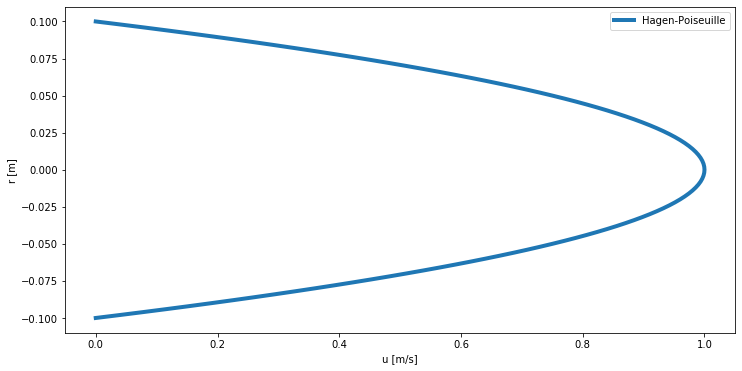

In [2]:
R    = 0.1
eta  = 1e-3
rho  = 1000
dpdx = -0.4

r = np.linspace(-R,R,101)
u = -dpdx*R**2/4/eta *(1-(r/R)**2)

plt.figure(figsize=(12,6))
plt.xlabel('u [m/s]')
plt.ylabel('r [m]')
plt.plot(u,r,linewidth=4,label='Hagen-Poiseuille')
plt.legend()

## Derivation of **Hagen-Poiseuille** flow law

The **Hagen-Poiseuille law** can be derived from the **Navier-Stokes equation**:
$$
\rho \frac{\partial \vec{u}}{\partial t}
+ \rho \left( \vec{u} \cdot \nabla \right) \vec{u}
= - \nabla p
+ \eta \Delta \vec{u}
- \rho \vec{g}
$$
Here,
$\vec{u}$ [m/s] is the velocity vector,
$\rho$ [kg/m$^3$] fluid density,
$\eta$ [Pas] fluid dynamic viscosity,
$\vec{g}$ [m/s$^2$] gravitational acceleration,
$p$ [Pa] pressure,
$t$ [s] time, and $\nabla$ [1/m] the Nabla operator, and
$\Delta$ [1/m$^2$] the Laplace operator. 

We simplify the Navier-Stokes equation by assuming 
- **steady-state flow:** $\frac{\partial \vec{u}}{\partial t}=0$
- **no advection:** $\left( \vec{u} \cdot \nabla \right) \vec{u}=0$
- **no gravitational force:** $\rho \vec{g}=0$
and then we find:
$$
\nabla p = \eta \Delta \vec{u}
$$

As we are dealing with a pipe, we use cylindrical coordinates, and only consider a radial dependence, thus
$$
{{1}\over{r}} \left( {{\partial}\over{\partial r}} r {{\partial u}\over{\partial r}} \right)
= {{1}\over{\eta}} {{dp}\over{dx}}
$$
A solution for the above differential equation is:
$$
u(r) = 
+{{dp}\over{dx}} {{1}\over{4\eta}} \left[ r^2 - R^2 \right] =
-{{dp}\over{dx}} {{R^2}\over{4\eta}} \left[ 1 - \left( {{r}\over{R}} \right)^2 \right]
$$
thus our **Hagen-Poiseuille flow**.

## Transient profile

The **Hagen-Poiseuille profile** is a steady-state profile of flow. As solution for the transient
development of the final profile can be approximated by Bessel functions:
$$
u(r,t) = -{{dp}\over{dx}} {{1}\over{4\eta}} \left( R^2 - r^2 \right)
+ {{dp}\over{dx}} {{2R^2}\over{\eta}}
\sum\limits_{n=1}^{\infty}
{{1}\over{\lambda_n^3}}
{{J_0(\lambda_n r / R)}\over{J_1(\lambda_n)}} e^{-\lambda_n^2 {{\eta t}\over{R^2}} }
$$
with $J_0$ and $J_1$ the Bessel functions of first kind and order zero resp. one.
$\lambda_n$ are the roots of $J_0$, $J_0(\lambda_n)=0$.

(101, 5)
(101,)


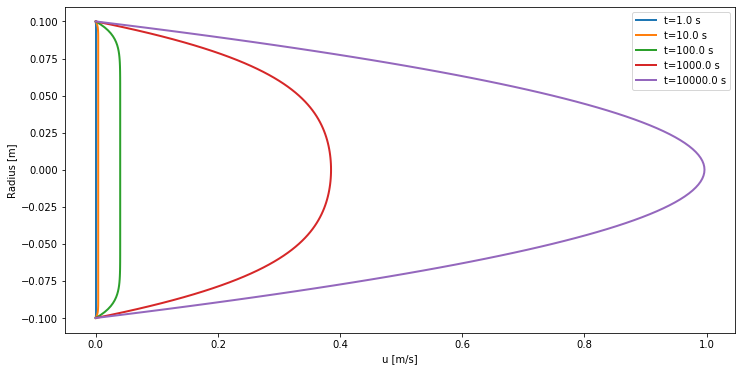

In [3]:
nzeros = 50
t = np.array([1,10,100,1000,1e4])
J0_roots = scipy.special.jn_zeros(0,nzeros)
#print('J0roots: ',J0_roots,J0_roots.shape)

utransient = np.zeros(len(r)*len(t)).reshape(len(r),len(t))
print(utransient.shape)
print(r.shape)
for i in range(len(t)):    
    for j in range(len(r)):
        besselsum = 0
        for n in range(nzeros):
            J0root  = J0_roots[n]
            J0      = scipy.special.jv(0,J0root*r[j]/R)
            J1      = scipy.special.jv(1,J0root)
            besselsum = besselsum + 1/J0root**3 * J0 / J1 * np.exp(-J0root**2*eta*t[i]/rho/R**2)
            #print(i,j,n,J0,J1,besselsum)
        utransient[j,i] = -dpdx/4/eta*(R**2-r[j]**2) + 2*dpdx*R**2/eta*besselsum
        
plt.figure(figsize=(12,6))
plt.xlabel('u [m/s]')
plt.ylabel('Radius [m]')
for i in range(len(t)):
    plt.plot(utransient[:,i],r,linewidth=2,label='t='+str(round(t[i],0))+' s')
plt.legend()

## Bessel functions

Bessel functions are solutions of the second-order differential equation:
$$
x^2 {{d^2J_{\alpha}}\over{dx^2}} + x {{dJ_{\alpha}}\over{dx}} + (x^2 - \alpha^2) J_{\alpha} = 0
$$
with $\alpha$ the **order** of the Bessel function $J_{\alpha}$.

In `python`, Bessel functions are implemented in the package `scipy.special`, as well as there
roots.

In [11]:
x = np.linspace(0,32,101)
J0 = scipy.special.jv(0,x)
J1 = scipy.special.jv(1,x)
J2 = scipy.special.jv(2,x)
nzeros = 10
J0_roots = scipy.special.jn_zeros(0,nzeros)

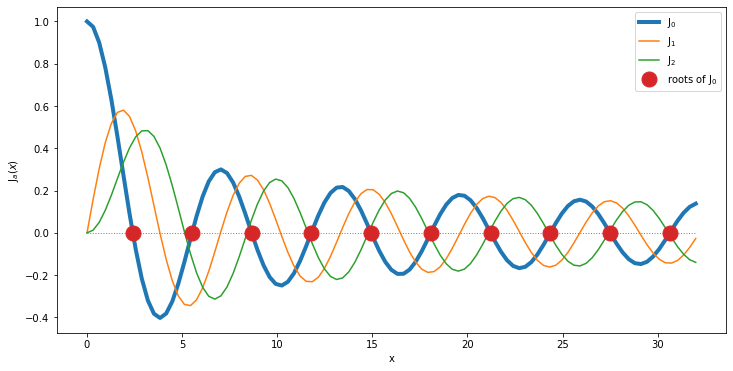

In [12]:
plt.figure(figsize=(12,6))
plt.xlabel('x')
plt.ylabel('J$_a(x)$')
plt.plot(x,J0,linewidth=4,label='J$_0$')
plt.plot(x,J1,label='J$_1$')
plt.plot(x,J2,label='J$_2$')
plt.plot(x,np.zeros(len(x)),linewidth=1,linestyle=':',color='gray')
plt.plot(J0_roots,np.zeros(len(J0_roots)),linestyle='none',marker='o',markersize=15,label='roots of J$_0$')
plt.legend()

... done